In [ ]:
!pip install tensorflow==2.18.0
!pip install onnx==1.14.0
!pip install tf2onnx==1.15.0
!pip install onnxruntime==1.15.1
!pip install keras_cv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.7/454.7 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 25.2.10
    Uninstalling flatbuffers-25.2.10:
      Successfully uninstalled flatbuffers-25.2.10
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.3 which is incompatible.
tensorflow 2.18.0 requires flatbuffers>=24.3.25, but you have flatbuffers 2.0.7 which is incompatible.
tensorflow-metadata 1.16.1 requires prot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 650.7/650.7 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 26.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf2onnx 1.15.0 requires protobuf~=3.20.2, but you have protobuf 5.29.3 which is incompatible.
tensorflow 2.18.0 requires flatbuffers>=24.3.25, but you have flatbuffers 2.0.7 which is inc

In [ ]:
import os
import onnx
import tf2onnx
import keras_cv
import onnxruntime as rt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model #imports

import matplotlib.pyplot as plt #imports

from sklearn.metrics import average_precision_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns

print("tensorflow version: ",{tf.__version__})

tensorflow version:  {'2.18.0'}


In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

#Dataset paths
path = 'drive/MyDrive/AgriLifeMicrohistologicalProject/LargeFeatureImages/SubImages 100 x 100'
#path = 'drive/MyDrive/AgriLifeMicrohistologicalProject/SubImages'
newpath = 'drive/MyDrive/AgriLifeMicrohistologicalProject/NewImages/Full'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def plotimg(images_arr, num_img):
  # Create a figure and axes.
  fig, axes = plt.subplots(1, num_img)
  # Flatten the axes array to easily iterate.
  axes = axes.flatten()
  # Iterate through images and corresponding axes.
  for img, ax in zip(images_arr * 255, axes):
    # Display the image on the current axis.
    ax.imshow(img)
    # Hide the axis ticks and labels.
    ax.axis('off')
  # Adjust subplot parameters for a tight layout.
  plt.tight_layout()
  # Display the plot.
  plt.show()

In [ ]:
image_size = (100,100) #set image dimensions

# Create data generators for training, validation, and testing
train_datagen = ImageDataGenerator(validation_split=0.2,
        #rotation_range=20,
        #width_shift_range=0.2,
        #height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        #brightness_range=[0.5, 1.5],
        fill_mode='nearest'
        )#dataset images

train = train_datagen.flow_from_directory( # Load training data
    path,
    target_size=image_size, #resize all uneven images
    batch_size=5500,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

X_train, y_train = train[0] # Extract training data and labels

valid = train_datagen.flow_from_directory( # Load training data
    path,
    target_size=image_size,
    batch_size=3000,
    class_mode='categorical',
    subset='validation',
    shuffle=True
)

X_val, y_val = valid[0] # Extract validation data and labels

# Normalize pixel values
X_train = X_train / 255.0
X_val = X_val / 255.0

# Print data shapes
print(X_train.shape)
print(X_val.shape)

Found 4700 images belonging to 4 classes.
Found 1172 images belonging to 4 classes.
(4700, 100, 100, 3)
(1172, 100, 100, 3)


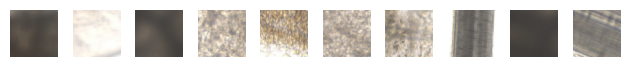

In [ ]:
plotimg(X_train[:10], 10) #plotimgs test

In [ ]:
#Backbone + Head models
from keras import datasets, layers, models, callbacks
from keras.optimizers import Adam, SGD

# Create Adam optimizer with custom learning rate
optimizer = Adam(learning_rate=0.0001)

#optimizerS = SGD(learning_rate=0.1)

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    patience=10,         # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best model weights
)

# Load the InceptionV3 model (pretrained on ImageNet)
inception_backbone = keras.applications.InceptionV3(
    weights='imagenet',
    include_top=False,  # Exclude the classification layers
    input_shape=(100, 100, 3)  # Adjust input shape if needed
)
inception_backbone.trainable = True # Freeze the InceptionV3 layers to prevent them from being updated during training

# Create your custom Inception classification head (using your CNN architecture)
inputs = keras.Input(shape=(100, 100, 3))  # Adjust input shape if needed
x = inception_backbone(inputs, training=False)  # Pass inputs through InceptionV3

'''# Load the ResNet50 model (pretrained on ImageNet)
resnet_backbone = keras.applications.ResNet101(
    weights='imagenet',
    include_top=False,  # Exclude the classification layers
    input_shape=(100, 100, 3)  # Adjust input shape if needed
)
resnet_backbone.trainable = True # Freeze the ResNet50 layers

# Create your custom ResNet50 classification head (using your CNN architecture)
inputs = keras.Input(shape=(100, 100, 3))  # Adjust input shape as needed
x = resnet_backbone(inputs, training=False)  # Pass inputs through ResNet50'''

x = layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding = 'same', name = 'Godson_Edewor_CNN')(x)
x = layers.MaxPooling2D((2, 2), padding = 'same')(x)

x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same')(x)
x = layers.MaxPooling2D((2, 2), padding  = 'same')(x)

x = layers.Flatten()(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation='sigmoid', name='output')(x)

# Create the complete model
cnn = keras.Model(inputs=inputs, outputs=outputs)

# Compile and train the model
cnn.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])#, keras.metrics.Precision(), keras.metrics.Recall()])

#cnn_history = cnn.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))
cnn_history = cnn.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks = [early_stopping], batch_size=32) #model trainer

print("\nValidation Accuracy: ")
cnn.evaluate(X_val, y_val) #validation accuracy

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 146s 438ms/step - accuracy: 0.4010 - loss: 0.5606 - val_accuracy: 0.7082 - val_loss: 0.2877
Epoch 2/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 40s 271ms/step - accuracy: 0.8325 - loss: 0.1996 - val_accuracy: 0.9036 - val_loss: 0.1710
Epoch 3/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 58s 140ms/step - accuracy: 0.9312 - loss: 0.0991 - val_accuracy: 0.9044 - val_loss: 0.1672
Epoch 4/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 73ms/step - accuracy: 0.9476 - loss: 0.0767 - val_accuracy: 0.9070 - val_loss: 0.1700
Epoch 5/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.9688 - loss: 0.0488 - val_accuracy: 0.8968 - val_loss: 0.1769
Epoch 6/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - accuracy: 0.9794 - loss: 0.0332 - val_accuracy: 0.9113 - val_loss: 0.1708
Epoch 7/100
147/147 ━━━━━━━━━━━━━━━━━━━━ 19s 71ms/step - accuracy: 0.9803 - loss: 0.0356 - val_accuracy: 0.9010 - val_loss: 0.1790
Epoch 8/100
147/147 ━━━━━━━━

[0.139419287443161, 0.9155290126800537]

37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Predicted percentages labels for validation
[[0.94 0.   0.11 0.  ]
 [0.01 0.99 0.   0.01]
 [0.22 0.01 0.79 0.  ]
 [0.2  0.01 0.82 0.  ]]

Labels the model predicted for validation
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]

Actual labels for validation
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]

How the model performed for each class in validation data
[[90.5  1.3  8.2  0.1]
 [ 8.  84.5  6.2  0.2]
 [14.1  3.8 82.4  0. ]
 [ 0.5  1.   0.  98.6]]

Mean Average Precision (mAP@S): 0.9536

Mean Average Precision (mAP@L): 0.8599

Total Trainable Parameters: 23567588

GRAPHS


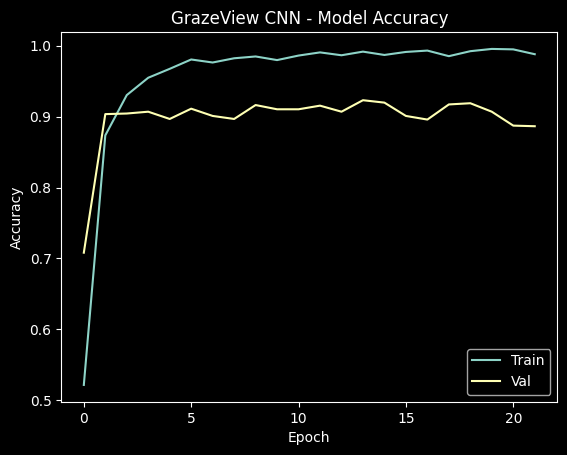

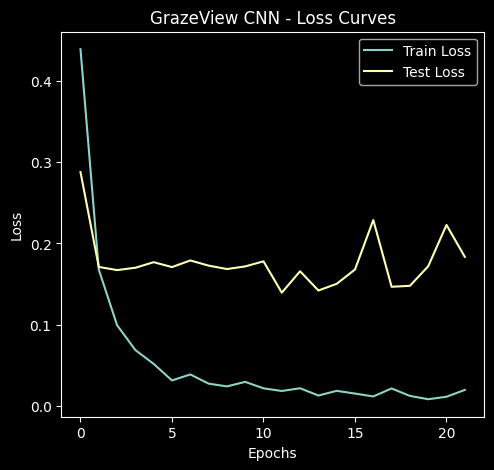

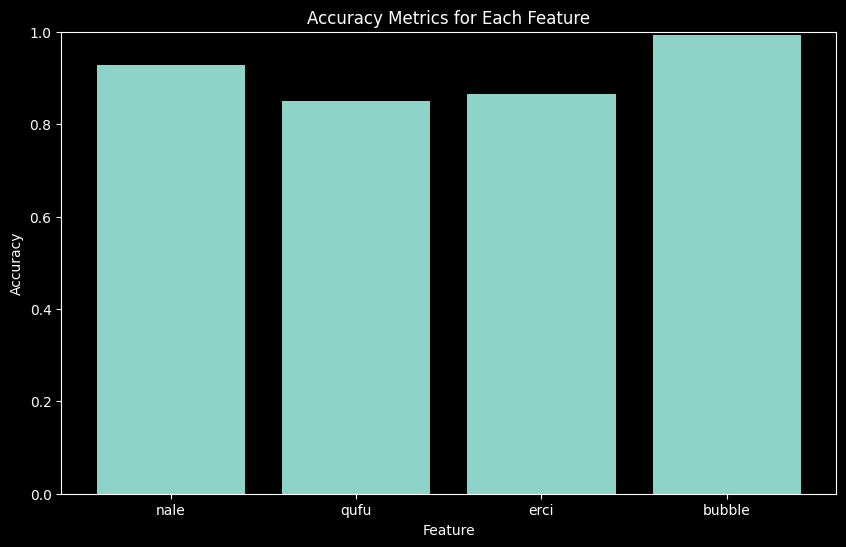

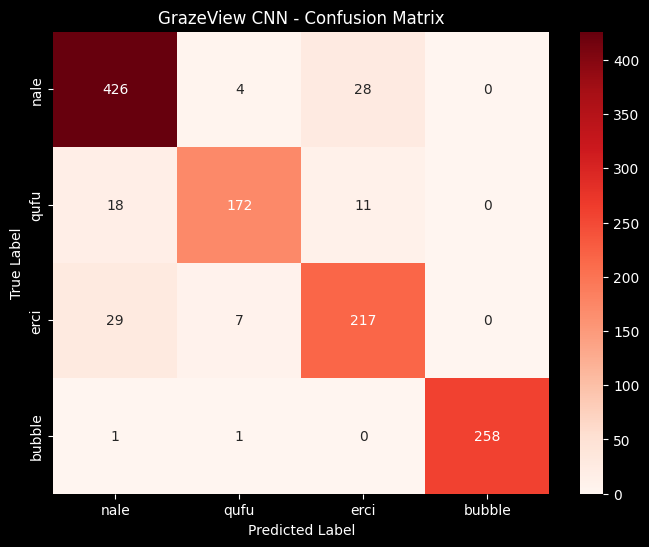

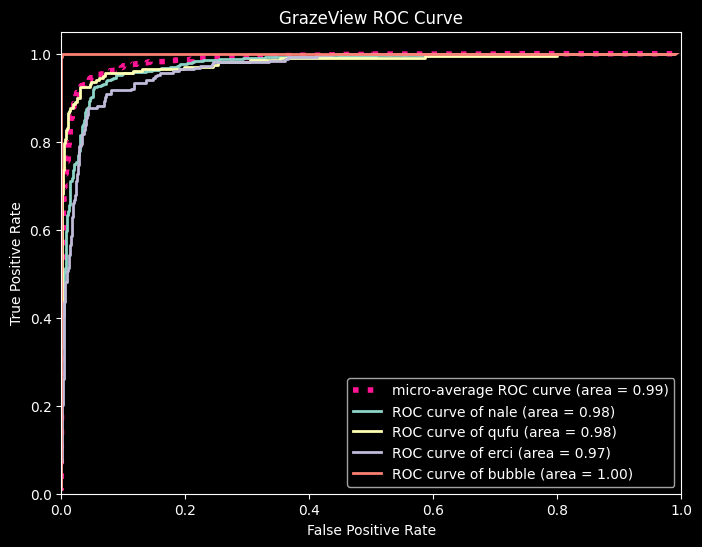

AUC for nale: 0.9767
AUC for qufu: 0.9807
AUC for erci: 0.9685
AUC for bubble: 1.0000
Micro-average AUC: 0.9862


In [ ]:
#Metrics

#[1. 0. 0. 0. 0.] - 0 - nale
#[0. 1. 0. 0. 0.] - 1 - qufu
#[0. 0. 1. 0. 0.] - 2 - erci
#[0. 0. 0. 1. 0.] - 3 - bubble
#[0. 0. 0. 0. 1.] - 4 - qufu stem

y_predicted_val = cnn.predict(X_val) #model prediction on validation
y_predicted_labels = tf.keras.utils.to_categorical(np.argmax(y_predicted_val, axis=1), num_classes=4) #one hot categorical predictions
y_predicted_rounded_percent = np.round(y_predicted_val, decimals=2) #rounded percents

#Print outs
print("Predicted percentages labels for validation")
print(y_predicted_rounded_percent[:4])
print("\nLabels the model predicted for validation")
print(y_predicted_labels[:4])
print("\nActual labels for validation")
print(y_val[:4])

class_percentages_list = []

# Iterate over each unique true class
for true_class in range(4):  # 4 classes
    # Find indices of samples belonging to the current true class
    indices = np.where(np.argmax(y_val, axis=1) == true_class)[0]

    # Get predicted probabilities for samples of the current true class
    class_probs = y_predicted_val[indices]

    # Calculate average percentages for each predicted class
    avg_percentages = np.mean(class_probs, axis=0) * 100

    #Rounds percents
    rounded_percentages = np.round(avg_percentages, decimals=1)

    #Appends to list
    class_percentages_list.append(rounded_percentages)

#Creates a numpy array of list
class_percentages = np.array(class_percentages_list)

print("\nHow the model performed for each class in validation data")
print(class_percentages)

average_precisions = []
for i in range(y_val.shape[1]):  # Iterate over clas
    average_precision = average_precision_score(y_val[:, i], y_predicted_val[:, i])
    average_precisions.append(average_precision)

# Calculate mean average precision (mAP)
mAP = np.mean(average_precisions)

print(f"\nMean Average Precision (mAP@L): {mAP:.4f}") #uses predicted range (less strict)

average_precisions = []
for i in range(y_val.shape[1]):  # Iterate over clas
    average_precision = average_precision_score(y_val[:, i], y_predicted_labels[:, i])
    average_precisions.append(average_precision)

# Calculate mean average precision (mAP)
mAP = np.mean(average_precisions)

print(f"\nMean Average Precision (mAP@S): {mAP:.4f}") #uses predicted labels (more strict)

total_trainable_params = sum([tf.size(w).numpy() for w in cnn.trainable_weights])
print(f"\nTotal Trainable Parameters: {total_trainable_params}")

print("\nGRAPHS")
plt.style.use('dark_background')

#Plots the overall model accuracy
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('GrazeView CNN - Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

#Plots the overall model loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Test Loss')
plt.title('GrazeView CNN - Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Assuming y_val and y_predicted_val are defined as in your provided code

num_classes = y_val.shape[1]  # Get the number of classes (4 in your case)
class_names = ['nale', 'qufu', 'erci', 'bubble']  # Define class names

# Calculate accuracy for each class separately
class_accuracies = []
for class_index in range(num_classes):
    # Find indices where true label matches the current class
    true_indices = np.where(y_val[:, class_index] == 1)[0]

    # Get predicted labels for the corresponding indices
    predicted_labels = y_predicted_val[true_indices, class_index]

    # Calculate accuracy for the current class
    accuracy = np.mean(predicted_labels.round() == y_val[true_indices, class_index])
    class_accuracies.append(accuracy)

# Plot the accuracies
plt.style.use('dark_background')  # Optional: Set dark background style
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.bar(class_names, class_accuracies)
plt.title('Accuracy Metrics for Each Feature')
plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for accuracy
plt.show()

# Convert predictions to class labels
y_pred_classes = np.argmax(y_predicted_val, axis=1)

# Get true labels for the validation set
y_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds',
            xticklabels=['nale', 'qufu', 'erci', 'bubble'],
            yticklabels=['nale', 'qufu', 'erci', 'bubble'])
plt.title('GrazeView CNN - Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Binarize the true labels
y_true_bin = label_binarize(y_true, classes=[0, 1, 2, 3])
n_classes = y_true_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, class_name in enumerate(class_names):  # Iterate using class names
    fpr[class_name], tpr[class_name], _ = roc_curve(y_true_bin[:, i], y_predicted_val[:, i])
    roc_auc[class_name] = auc(fpr[class_name], tpr[class_name])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), y_predicted_val.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

for class_name in class_names:
    plt.plot(fpr[class_name], tpr[class_name], lw=2,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(class_name, roc_auc[class_name]))  # Use class_name

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('GrazeView ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC for each class
for class_name in class_names:
    print(f"AUC for {class_name}: {roc_auc[class_name]:.4f}")

# Print micro-average AUC
print(f"Micro-average AUC: {roc_auc['micro']:.4f}")


In [ ]:
#Benchmarks
from keras import datasets, layers, models, callbacks
from keras.optimizers import Adam

# Create Adam optimizer with custom learning rate
optimizer = Adam(learning_rate=0.0001)

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    patience=3,         # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best model weights
)

'''# Load the EfficientNetB0 model (pretrained on ImageNet)
efficientnet_backbone = keras.applications.EfficientNetB0(
    weights='imagenet',
    include_top=False,  # Exclude the classification layers
    input_shape=(100, 100, 3)  # Adjust input shape if needed
)
efficientnet_backbone.trainable = True  # Freeze the EfficientNetB0 layers to prevent them from being updated during training

# Create your custom EfficientNet classification head (using your CNN architecture)
inputs = keras.Input(shape=(100, 100, 3))  # Adjust input shape if needed
x = efficientnet_backbone(inputs, training=False)  # Pass inputs through EfficientNetB0'''

# Load a YOLOV8 model. (pretrained on COCO)
yolo_v8 = keras_cv.models.YOLOV8Backbone.from_preset("yolo_v8_l_backbone_coco")
yolo_v8.trainable = False  # Freeze all layers of the model

# Create your custom YOLO classification head (using your CNN architecture)
inputs = keras.Input(shape=(100, 100, 3))  # Adjust input shape as needed
x = yolo_v8(inputs)  # Pass input through YOLOv8

x = layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding = 'same', name = 'Godson_Edewor_CNN')(x)
x = layers.MaxPooling2D((2, 2), padding = 'same')(x)

x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same')(x)
x = layers.MaxPooling2D((2, 2), padding  = 'same')(x)

x = layers.Flatten()(x)
x = layers.Dense(4096, activation='relu')(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(4, activation='sigmoid')(x)  # Output layer with 4 classes

# Create the complete model
cnn = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
cnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

cnn_history = cnn.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks = [early_stopping], batch_size=32)

print("\nValidation Accuracy: ")
cnn.evaluate(X_val, y_val) #validation accuracy

Epoch 1/50
145/147 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.3927 - loss: 0.5742

KeyboardInterrupt: 

In [ ]:
#Standalone Head

from keras import datasets, layers, models, callbacks
from keras.optimizers import Adam

# Create Adam optimizer with custom learning rate
optimizer = Adam(learning_rate=0.0001)

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor (e.g., validation loss)
    patience=10,         # Number of epochs to wait before stopping
    restore_best_weights=True  # Restore the best model weights
)

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(100, 100, 3), name = 'Godson_CNN'), #1st conv layers,
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), #2nd conv layer
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'), #1st fully connected layers
    layers.Dropout(0.5),
    #layers.Dense(2128, activation='relu'), #2nd dense layer
    #layers.Dropout(0.5),
    layers.Dense(4, activation='sigmoid', name = 'output') #activation layer
])

#AlexNet inspired architecture
'''cnn = models.Sequential([
    layers.Conv2D(filters=96, kernel_size=(11, 11), activation='relu', input_shape=(100, 100, 3), strides = 4, name = 'Godson_CNN'), #1st conv layers,
    layers.MaxPooling2D((3, 3), strides=2),

    layers.Conv2D(filters=256, kernel_size=(5, 5), activation='relu'), #2nd conv layer
    layers.MaxPooling2D((3, 3), strides=2),

    layers.Conv2D(filters=384, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.Conv2D(filters=384, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding = 'same'),
    layers.MaxPooling2D((3, 3), strides=2),

    layers.Flatten(),
    layers.Dense(4096, activation='relu'), #1st fully connected layers
    layers.Dropout(0.5),
    layers.Dense(4096, activation='relu'), #2nd dense layer
    layers.Dropout(0.5),
    layers.Dense(1000, activation='relu'),
    layers.Dense(4, activation='sigmoid', name = 'output') #activation layer
])'''

cnn.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy']) #compiler

cnn_history = cnn.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks = [early_stopping]) #model trainer
#cnn_history = cnn.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

print("\nValidation Accuracy: ")
cnn.evaluate(X_val, y_val) #validation accuracy

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


Predicted percentages labels for validation
[[0.   0.   1.   0.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   1.   0.  ]
 [0.03 0.08 0.88 0.  ]]

Labels the model predicted for validation
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]

Actual labels for validation
[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]

How the model performed for each class in validation data
[[84.8  6.3  9.1  0.3]
 [ 5.7 88.   5.8  1.5]
 [12.5  6.7 80.2  0.2]
 [ 0.5  3.7  0.2 96.3]]

Mean Average Precision (mAP@S): 0.9624

Mean Average Precision (mAP@L): 0.8706

GRAPHS


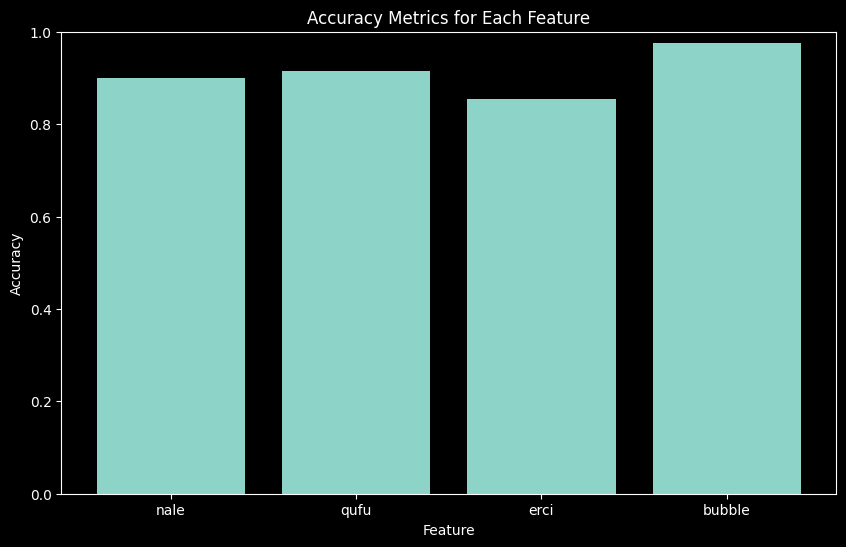

In [ ]:
# 1. Load the ONNX model
sess = rt.InferenceSession("GrazeView_accur91_fixedNale.onnx")

# 2. Get the input name for the model
input_name = sess.get_inputs()[0].name

# 3. Iterate through images in X_test and make predictions
all_predictions = []  # To store all predictions

for image in X_val:
    # Preprocess the image if necessary (e.g., reshape)
    image = image.reshape(1, *image.shape)  # Add batch dimension

    # Make prediction
    pred_onx = sess.run(None, {input_name: image.astype(np.float32)})[0]

    # Get class probabilities (assuming sigmoid output)
    probabilities = pred_onx  # If your model has a sigmoid output, probabilities are directly the output

    all_predictions.append(probabilities)  # Add to list of

y_predicted_val = np.squeeze(np.array(all_predictions))
y_predicted_labels = tf.keras.utils.to_categorical(np.argmax(y_predicted_val, axis=1), num_classes=4) #one hot categorical predictions
y_predicted_rounded_percent = np.round(y_predicted_val, decimals=2) #rounded percents

#Print outs
print("Predicted percentages labels for validation")
print(y_predicted_rounded_percent[:4])
print("\nLabels the model predicted for validation")
print(y_predicted_labels[:4])
print("\nActual labels for validation")
print(y_val[:4])

class_percentages_list = []

# Iterate over each unique true class
for true_class in range(4):  # 4 classes
    # Find indices of samples belonging to the current true class
    indices = np.where(np.argmax(y_val, axis=1) == true_class)[0]

    # Get predicted probabilities for samples of the current true class
    class_probs = y_predicted_val[indices]

    # Calculate average percentages for each predicted class
    avg_percentages = np.mean(class_probs, axis=0) * 100

    #Rounds percents
    rounded_percentages = np.round(avg_percentages, decimals=1)

    #Appends to list
    class_percentages_list.append(rounded_percentages)

#Creates a numpy array of list
class_percentages = np.array(class_percentages_list)

print("\nHow the model performed for each class in validation data")
print(class_percentages)

average_precisions = []
for i in range(y_val.shape[1]):  # Iterate over clas
    average_precision = average_precision_score(y_val[:, i], y_predicted_val[:, i])
    average_precisions.append(average_precision)

# Calculate mean average precision (mAP)
mAP = np.mean(average_precisions)

print(f"\nMean Average Precision (mAP@S): {mAP:.4f}") #uses predicted range (less strict)

average_precisions = []
for i in range(y_val.shape[1]):  # Iterate over clas
    average_precision = average_precision_score(y_val[:, i], y_predicted_labels[:, i])
    average_precisions.append(average_precision)

# Calculate mean average precision (mAP)
mAP = np.mean(average_precisions)

print(f"\nMean Average Precision (mAP@L): {mAP:.4f}") #uses predicted labels (more strict)

print("\nGRAPHS")
plt.style.use('dark_background')

# Assuming y_val and y_predicted_val are defined as in your provided code

num_classes = y_val.shape[1]  # Get the number of classes (4 in your case)
class_names = ['nale', 'qufu', 'erci', 'bubble']  # Define class names

# Calculate accuracy for each class separately
class_accuracies = []
for class_index in range(num_classes):
    # Find indices where true label matches the current class
    true_indices = np.where(y_val[:, class_index] == 1)[0]

    # Get predicted labels for the corresponding indices
    predicted_labels = y_predicted_val[true_indices, class_index]

    # Calculate accuracy for the current class
    accuracy = np.mean(predicted_labels.round() == y_val[true_indices, class_index])
    class_accuracies.append(accuracy)

# Plot the accuracies
plt.style.use('dark_background')  # Optional: Set dark background style
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.bar(class_names, class_accuracies)
plt.title('Accuracy Metrics for Each Feature')
plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for accuracy
plt.show()

In [ ]:
cnn.output_names = ['output']

onnx_model, _ = tf2onnx.convert.from_keras(cnn, opset=13)

onnx.save_model(onnx_model, "GrazeView_accur93_fixedNale.onnx")

In [ ]:
#Model predictions for the simulated new images data
test_datagen = ImageDataGenerator() # Normalize test data

test = test_datagen.flow_from_directory(
    newpath,
    target_size=image_size,
    batch_size=11000,
    class_mode='categorical'
)

X_test, y_test = test[0]# Extract test data and labels

X_test = X_test / 255.0

print(X_test.shape)

Found 10195 images belonging to 1 classes.
(10195, 100, 100, 3)


In [ ]:
y_predicted = cnn.predict(X_test)
y_predicted_rounded = np.round(y_predicted, decimals=2) #rounded percents
print(y_predicted_rounded[:5])

# Get the number of predictions (rows in y_predicted)
num_predictions = y_predicted.shape[0]

# Transpose y_predicted to get column sums
class_sums = np.sum(y_predicted, axis=0)

# Calculate average probabilities
average_probabilities = [col_sum / num_predictions for col_sum in class_sums]

print("\nPython Model Output")

print(f"\nNale Percent: {average_probabilities[0] * 100:.2f}")
print(f"Qufu Percent: {average_probabilities[1] * 100:.2f}")
print(f"Erci Percent: {average_probabilities[2] * 100:.2f}")
print(f"Bubble Percent: {average_probabilities[3] * 100:.2f}")

319/319 [==============================] - 13s 40ms/step
[[0.01 0.   0.99 0.  ]
 [0.01 0.95 0.04 0.  ]
 [0.54 0.32 0.12 0.02]
 [0.01 0.   0.98 0.  ]
 [0.97 0.   0.03 0.  ]]

Python Model Output

Nale Percent: 40.09
Qufu Percent: 24.94
Erci Percent: 28.42
Bubble Percent: 5.74


In [ ]:
# 1. Load the ONNX model
sess = rt.InferenceSession("GrazeView_accur92_fixedNale.onnx")

# 2. Get the input name for the model
input_name = sess.get_inputs()[0].name

# 3. Iterate through images in X_test and make predictions
all_predictions = []  # To store all predictions

for image in X_test:
    # Preprocess the image if necessary (e.g., reshape)
    image = image.reshape(1, *image.shape)  # Add batch dimension

    # Make prediction
    pred_onx = sess.run(None, {input_name: image.astype(np.float32)})[0]

    # Get class probabilities (assuming sigmoid output)
    probabilities = pred_onx  # If your model has a sigmoid output, probabilities are directly the output

    all_predictions.append(probabilities)  # Add to list of

num_predictions = len(all_predictions)

# Initialize class sums to 0
class_sums = [0] * len(all_predictions[0])  # Assuming all sublists have the same length

# Calculate class sums
for prediction in all_predictions:
    for i, prob in enumerate(prediction):
        class_sums[i] += prob

# Calculate average probabilities
average_probabilities = [col_sum / num_predictions for col_sum in class_sums]

print("ONNX Python Output")

print(f"\nNale Percent: {average_probabilities[0][0] * 100:.2f}")
print(f"Qufu Percent: {average_probabilities[0][1] * 100:.2f}")
print(f"Erci Percent: {average_probabilities[0][2] * 100:.2f}")
print(f"Bubble Percent: {average_probabilities[0][3] * 100:.2f}")

ONNX Python Output

Nale Percent: 31.36
Qufu Percent: 37.94
Erci Percent: 30.34
Bubble Percent: 6.10


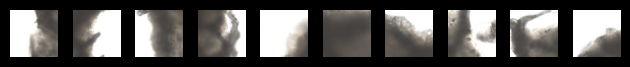

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
[[0.01 0.95 0.   0.02]
 [0.55 0.07 0.01 0.04]
 [0.13 0.81 0.03 0.  ]
 [0.05 0.94 0.01 0.  ]
 [0.11 0.09 0.   0.76]
 [0.01 0.99 0.   0.  ]
 [0.01 0.99 0.   0.  ]
 [0.78 0.33 0.02 0.  ]
 [0.37 0.91 0.   0.  ]
 [0.   0.85 0.   0.13]]


In [ ]:
indices = np.where(np.all(y_val == [0, 1, 0, 0], axis=1))[0] #change where the 1 is to change what feature you're looking at

# Get the images corresponding to the selected indices
selected_images = X_val[indices][40:50]

# Plot the selected images using the plotimg function
plotimg(selected_images, 10)

predicted_labels = cnn.predict(selected_images)
predicted_labels_rounded = np.round(predicted_labels, decimals=2)

# Print the predicted labels
print(predicted_labels_rounded)

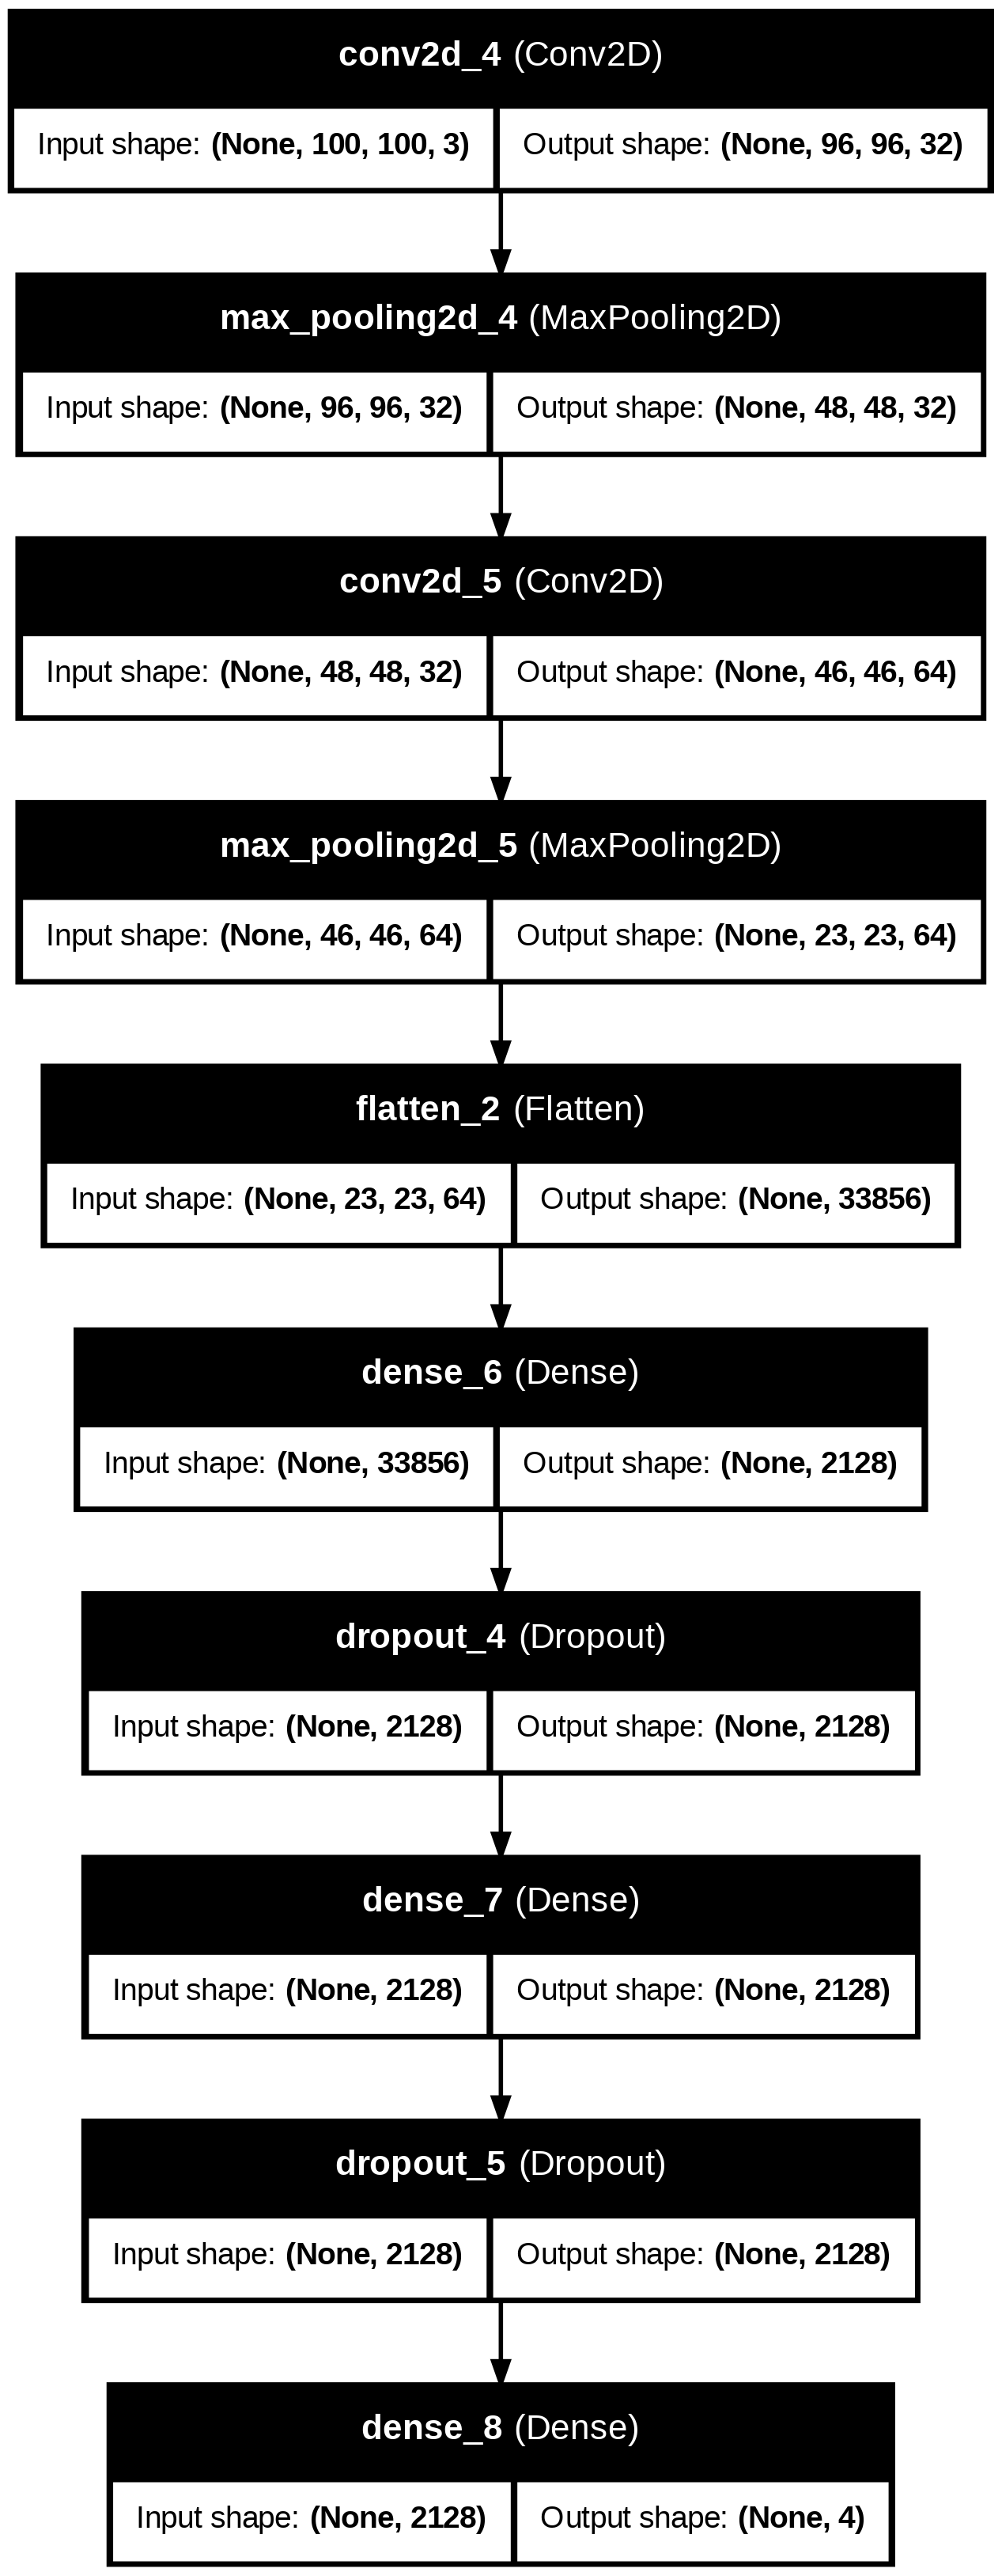

In [ ]:
#Creates a layout of model architecture
plot_model(cnn, to_file='model_dark.png', show_shapes=True,
           show_layer_names=True, rankdir='TB')